# Анализ АБ-теста по ключевым метрикам

## Введение

В этом проекте мы проводим анализ АБ-теста для проверки гипотезы о том, что нет статистически значимой разницы между контрольной и тестовой группами по следующим показателям:

- Количество поисков
- Количество просмотров контента
- Количество добавок в корзину
- Количество отзывов (# of impressions)


## Гипотезы

1. **Поиск:**
   - H1: Между группами есть значимая разница в количестве поисков
   - H0: Между группами нет значимой разницы в количестве поисков

2. **Просмотр контента:**
   - H1: Между группами есть значимая разница в количестве просмотров контента
   - H0: Между группами нет значимой разницы в количестве просмотров контента

3. **Добавки в корзину:**
   - H1: Между группами есть значимая разница в количестве добавок в корзину
   - H0: Между группами нет значимой разницы в количестве добавок в корзину

4. **Отзывы:**
   - H1: Между группами есть значимая разница в количестве отзывов
   - H0: Между группами нет значимой разницы в количестве отзывов

### Загружаем данные

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel('ab_7_data.xlsx', index_col = 0)

In [3]:
df.head()

,index,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,0,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
1,1,Test Campaign,2.08.2019,2542,100719.0,91236.0,4657.0,2359.0,1548.0,879.0,677.0
2,2,Test Campaign,3.08.2019,2365,70263.0,45198.0,7885.0,2572.0,2367.0,1268.0,578.0
3,3,Test Campaign,4.08.2019,2710,78451.0,25937.0,4216.0,2216.0,1437.0,566.0,340.0
4,4,Test Campaign,5.08.2019,2297,114295.0,95138.0,5863.0,2106.0,858.0,956.0,768.0


#### Переименовываем название столбцов для читабельности

In [4]:
df = df.rename({'index':'client_id'}, axis = 1)

In [5]:
df.rename({'Spend [USD]':'spend_usd'}, axis = 1, inplace = True)

In [6]:
df.rename({'# of Impressions':'number_of_impressions'}, axis = 1, inplace = True)

In [7]:
df.rename({'# of Website Clicks':'number_of_clicks'}, axis = 1, inplace = True)

In [8]:
df.rename({'# of Searches':'number_of_searches'}, axis = 1, inplace = True)

In [9]:
df.rename({'# of View Content':'number_of_views'}, axis = 1, inplace = True)

In [10]:
df.rename({'# of Add to Cart':'add_to_cart'}, axis = 1, inplace = True)

In [11]:
df.rename({'# of Purchase':'Purchases'}, axis = 1, inplace = True)

#### Проверяем дубликаты 

In [12]:
df = df.dropna()

In [13]:
df['client_id'].nunique()

59

Дубликаты не обнаружены

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 0 to 59
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   client_id              59 non-null     int64  
 1   Campaign Name          59 non-null     object 
 2   Date                   59 non-null     object 
 3   spend_usd              59 non-null     int64  
 4   number_of_impressions  59 non-null     float64
 5   Reach                  59 non-null     float64
 6   number_of_clicks       59 non-null     float64
 7   number_of_searches     59 non-null     float64
 8   number_of_views        59 non-null     float64
 9   add_to_cart            59 non-null     float64
 10  Purchases              59 non-null     float64
dtypes: float64(7), int64(2), object(2)
memory usage: 5.5+ KB


## Проверка распределения данных
Мы начинаем с проверки распределения данных для каждой из метрик. Это поможет нам лучше подобрать статистический тест для последующего анализа.


C:\Users\kanat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


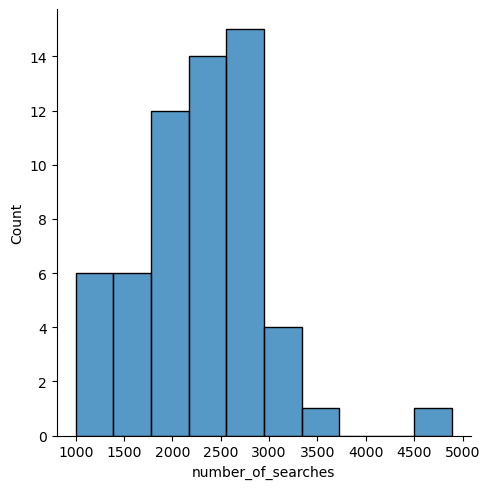

In [15]:
sns.displot(df['number_of_searches'])

C:\Users\kanat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


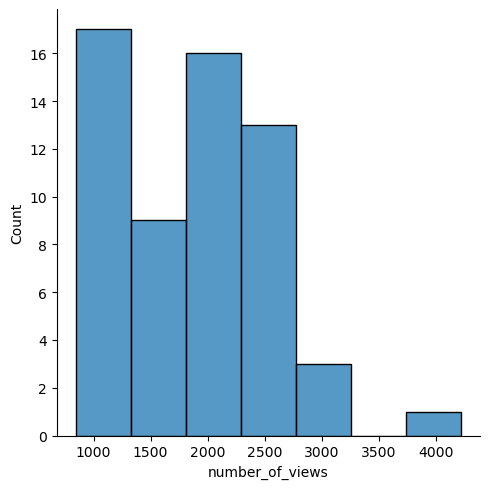

In [16]:
sns.displot(df['number_of_views'])

C:\Users\kanat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


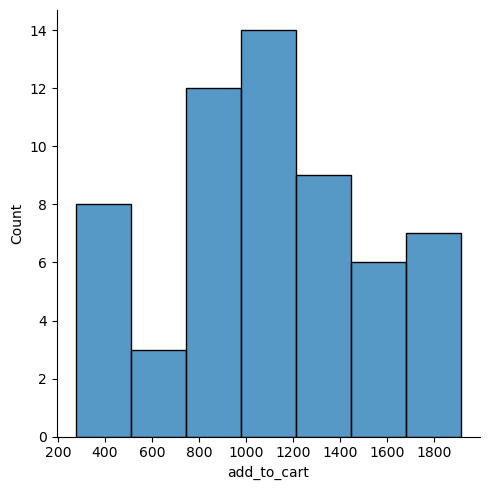

In [17]:
sns.displot(df['add_to_cart'])

C:\Users\kanat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


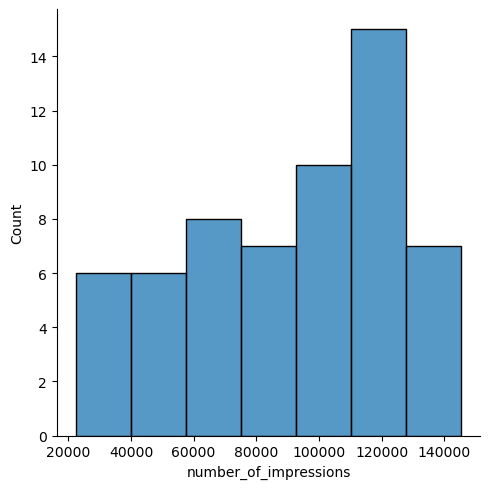

In [18]:
sns.displot(df['number_of_impressions'])

## Выбор статистического теста: Тест Манна-Уитни

После визуальной проверки графиков распределения метрик мы обнаружили, что данные значительно отклоняются от нормального распределения. Таким образом, использование параметрических тестов, основанных на предположении о нормальности данных, не является подходящим.

Для проверки данных гипотез лучше использовать Тест Манна-Уитни, потому что:

- Ненормальное распределение данных
- Независимые выборки: Тест Манна-Уитни применим для сравнения двух независимых выборок, что делает его подходящим для нашего анализа
- Не чувствителен к выбросам

## Подготовка данных и разделение на группы перед тестированием

Для проведения анализа АБ-теста необходимо разделить данные на контрольную и тестовую группы. Мы добавляем столбец 'Group', который присваивает каждой записи значение 'A' для 'Control Campaign', 'B' для 'Test Campaign', и `None` для остальных случаев.



In [19]:
def assign_group(row):
    if row['Campaign Name'] == 'Test Campaign':
        return 'B'
    elif row['Campaign Name'] == 'Control Campaign':
        return 'A'
    else:
        return None  

df['Group'] = df.apply(assign_group, axis=1)

In [20]:
df.groupby('Group').agg({'client_id':'nunique'}).reset_index()

,Group,client_id
0,A,29
1,B,30


In [21]:
b = df.query('Group=="B"')
a = df.query('Group=="A"')

#### Фильтрация данных по общему идентификатору 'client_id'

In [22]:
b[b['client_id'].isin(a['client_id'])]

,client_id,Campaign Name,Date,spend_usd,number_of_impressions,Reach,number_of_clicks,number_of_searches,number_of_views,add_to_cart,Purchases,Group


In [23]:
a[a['client_id'].isin(b['client_id'])]

,client_id,Campaign Name,Date,spend_usd,number_of_impressions,Reach,number_of_clicks,number_of_searches,number_of_views,add_to_cart,Purchases,Group


В результате фильтрации не обнаружено отклонений

### Проверяем гипотезы


In [24]:
from scipy.stats import mannwhitneyu

In [25]:
df.groupby('Group').agg({'number_of_searches':'count'})

,number_of_searches
Group,
A,29
B,30


In [26]:
mannwhitneyu(a['number_of_searches'], b['number_of_searches'])

MannwhitneyuResult(statistic=346.0, pvalue=0.17964361698819864)

- Между группами нет значимой разницы в количестве поисков.
- Использовали тест Манна Уитни, потому что распределение не нормальное.

In [27]:
mannwhitneyu(a['number_of_views'], b['number_of_views'])

MannwhitneyuResult(statistic=442.0, pvalue=0.9214899604244585)

- Между группами нет значимой разницы в количестве просмотров контента.
- Использовали тест Манна Уитни, потому что распределение не нормальное.

In [28]:
#mannwhitneyu(a['add_to_cart'], b['add_to_cart'])
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(a['add_to_cart'], b['add_to_cart'])
t_stat, p_value

(4.24906420944249, 8.032960071149041e-05)

- Между группами есть значимая разница в количестве добавок в корзину 
- Использовали тест Т сьюдента, потому что распределение близко к нормальному.

In [29]:
mannwhitneyu(a['number_of_impressions'], b['number_of_impressions'])

MannwhitneyuResult(statistic=697.0, pvalue=7.344126278759323e-05)

- Между группами нет значимой разницы в количестве отзывов
- Использовали тест Манна Уитни, потому что распределение не нормальное.

## Вывод и результаты анализа АБ-теста

### Анализ количества поисков

Проведенный тест Манна-Уитни для количества поисков в контрольной (`a`) и тестовой (`b`) группах не показал статистически значимой разницы (статистика теста = 346.0, p-value = 0.1796). Это свидетельствует о том, что между группами нет значимого различия в количестве поисков. Использование теста Манна-Уитни в данном случае обосновано, так как распределение данных не является нормальным.

### Анализ количества просмотров контента

Также для количества просмотров контента результаты теста Манна-Уитни не выявили статистически значимых различий между контрольной и тестовой группами (статистика теста = 442.0, p-value = 0.9215). Это подтверждает отсутствие значимой разницы в количестве просмотров контента между группами, и тест Манна-Уитни использован правильно, учитывая не нормальное распределение данных.

### Анализ количества добавок в корзину

Для количества добавок в корзину использовался t-тест Стьюдента, так как распределение данных близко к нормальному. Результаты теста показали статистически значимую разницу между группами (t-статистика = 4.25, p-value = 8.03e-05). Это говорит о том, что между контрольной и тестовой группами существует значимое различие в количестве добавок в корзину.

### Анализ количества отзывов

Тест Манна-Уитни для количества отзывов показал статистически значимую разницу между группами (статистика теста = 697.0, p-value = 7.34e-05). Таким образом, мы отвергаем нулевую гипотезу и утверждаем, что между контрольной и тестовой группами есть статистически значимая разница в количестве отзывов.

### Общий вывод

1. Для метрик "Количество поисков" и "Количество просмотров контента" не обнаружено статистически значимых различий между группами.
2. Для метрики "Количество добавок в корзину" существует статистически значимая разница между контрольной и тестовой группами.
3. Для метрики "Количество отзывов" также обнаружена статистически значимая разница между группами.